In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix ,f1_score ,classification_report
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.impute import KNNImputer ,SimpleImputer
import scikitplot

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [6]:
train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
print('The shape of training data is :',train_set.shape)
train_set.head()

The shape of training data is : (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
print('The shape of testing data is :',test_set.shape)
test_set.head()

The shape of testing data is : (16281, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
print('Info for training data is below:')
print(train_set.info())
print()
print('Info for testing data is below:')
print(test_set.info())

Info for training data is below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Info for testing data is below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-

In [10]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
train_set[train_set['workclass'].str.endswith('?')==True]
# Here we have 1836 records where workclass is given as ? 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [13]:
test_set[test_set['workclass'].str.endswith('?')==True]
# Here we have 963 records where workclass is given as ? 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,61,?,265201,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
16208,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
16239,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [14]:
train_set[train_set['occupation'].str.endswith('?')==True]
# Here we have 1843 records where occupation is given as ? 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
test_set[test_set['occupation'].str.endswith('?')==True]
# Here we have 966 records where occupation is given as ? 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,61,?,265201,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
16208,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
16239,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [16]:
ind=np.where(train_set['native_country'].str.endswith('?')==True)
train_set.iloc[ind]['native_country']
# There are 583 records where native_country is given as ?

14        ?
38        ?
51        ?
61        ?
93        ?
         ..
32449     ?
32469     ?
32492     ?
32510     ?
32525     ?
Name: native_country, Length: 583, dtype: object

In [17]:
ind=np.where(test_set['native_country'].str.endswith('?')==True)
test_set.iloc[ind]['native_country']
# There are 274 records where native_country is given as ?

19        ?
65        ?
83        ?
188       ?
253       ?
         ..
15684     ?
15711     ?
16043     ?
16090     ?
16265     ?
Name: native_country, Length: 274, dtype: object

In [18]:
ind=np.where((train_set['occupation'].str.endswith('?')==True) & (train_set['workclass'].str.endswith('?')==True) & 
             (train_set['native_country'].str.endswith('?')==True))
print('The index where occupation , workclass & native_country are ?: ',ind)
print('The Shape is: ',train_set.iloc[ind].shape)
train_set.iloc[ind]
# Here we have 27 records where nativ_country,occupation & workclass is given as ? 

The index where occupation , workclass & native_country are ?:  (array([   61,   297,  1152,  1676,  2513,  3131,  3579,  3834,  6059,
        7862,  9616, 11614, 12996, 16488, 16838, 18615, 20333, 20480,
       23729, 23915, 25359, 26296, 26363, 28194, 28688, 30369, 32525],
      dtype=int64),)
The Shape is:  (27, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
1152,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,?,<=50K
1676,64,?,168340,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,?,>50K
2513,47,?,174525,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3942,0,40,?,<=50K
3131,25,?,237865,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,?,<=50K
3579,21,?,180303,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,25,?,<=50K
3834,32,?,169886,Bachelors,13,Never-married,?,Not-in-family,White,Female,0,0,20,?,<=50K
6059,35,?,163582,10th,6,Divorced,?,Unmarried,White,Female,0,0,16,?,<=50K
7862,29,?,125159,Some-college,10,Never-married,?,Not-in-family,Black,Male,0,0,36,?,<=50K


In [19]:
ind=np.where((test_set['occupation'].str.endswith('?')==True) & (test_set['workclass'].str.endswith('?')==True) & 
             (test_set['native_country'].str.endswith('?')==True))
print('The index where occupation , workclass & native_country are ?: ',ind)
print('The Shape is: ',test_set.iloc[ind].shape)
test_set.iloc[ind]
# Here we have 19 records where nativ_country,occupation & workclass is given as ? 

The index where occupation , workclass & native_country are ?:  (array([ 2160,  2323,  2584,  2612,  2774,  3074,  3671,  3853,  5052,
        5972,  6800,  7231, 10266, 10408, 10508, 12576, 13240, 14202,
       14372], dtype=int64),)
The Shape is:  (19, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
2160,28,?,243190,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,30,?,<=50K.
2323,50,?,339547,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,50,?,<=50K.
2584,47,?,163748,Masters,14,Divorced,?,Unmarried,White,Female,0,0,35,?,<=50K.
2612,27,?,258231,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,?,<=50K.
2774,27,?,132372,HS-grad,9,Never-married,?,Unmarried,White,Female,0,0,40,?,<=50K.
3074,23,?,264874,Assoc-voc,11,Never-married,?,Other-relative,White,Female,0,0,40,?,<=50K.
3671,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,11,?,<=50K.
3853,28,?,195568,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,15,?,>50K.
5052,21,?,156780,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,15,?,<=50K.
5972,40,?,95049,Assoc-voc,11,Separated,?,Own-child,White,Female,0,0,40,?,<=50K.


In [20]:
train_set.loc[[61,297,30369,32525],:]# sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
30369,20,?,250037,Some-college,10,Never-married,?,Own-child,White,Female,0,0,18,?,<=50K
32525,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K


In [21]:
test_set.loc[[2160,2323,14202,14372],:]# Testing sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
2160,28,?,243190,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,30,?,<=50K.
2323,50,?,339547,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,50,?,<=50K.
14202,18,?,112137,Some-college,10,Never-married,?,Own-child,Other,Female,0,0,20,?,<=50K.
14372,22,?,229799,Some-college,10,Never-married,?,Other-relative,White,Male,0,0,45,?,<=50K.


In [22]:
# Training data
train_set['workclass']=train_set['workclass'].replace(' ?',np.nan)
train_set['occupation']=train_set['occupation'].replace(' ?',np.nan)
train_set['native_country']=train_set['native_country'].replace(' ?',np.nan)

In [23]:
# Testing data
test_set['workclass']=test_set['workclass'].replace(' ?',np.nan)
test_set['occupation']=test_set['occupation'].replace(' ?',np.nan)
test_set['native_country']=test_set['native_country'].replace(' ?',np.nan)

In [24]:
train_set.loc[[61,297,30369,32525],:]# sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
297,39,NaN,157443,Masters,14,Married-civ-spouse,NaN,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,<=50K
30369,20,NaN,250037,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,18,NaN,<=50K
32525,81,NaN,120478,Assoc-voc,11,Divorced,NaN,Unmarried,White,Female,0,0,1,NaN,<=50K


In [25]:
test_set.loc[[2160,2323,14202,14372],:]# Testing sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K.
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K.
14202,18,NaN,112137,Some-college,10,Never-married,NaN,Own-child,Other,Female,0,0,20,NaN,<=50K.
14372,22,NaN,229799,Some-college,10,Never-married,NaN,Other-relative,White,Male,0,0,45,NaN,<=50K.


In [26]:
pd.DataFrame([train_set.isna().sum(),test_set.isna().sum()],index=['Training data','Testing data']).T

,Training data,Testing data
age,0,0
workclass,1836,963
fnlwgt,0,0
education,0,0
education_num,0,0
marital_status,0,0
occupation,1843,966
relationship,0,0
race,0,0
sex,0,0


In [27]:
sm=SimpleImputer(np.nan,strategy='most_frequent')
train_set['workclass']=sm.fit_transform(train_set[['workclass']])
train_set['occupation']=sm.fit_transform(train_set[['occupation']])
train_set['native_country']=sm.fit_transform(train_set[['native_country']])
train_set.head()

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass missing_values=nan as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
sm1=SimpleImputer(np.nan,strategy='most_frequent')
test_set['workclass']=sm1.fit_transform(test_set[['workclass']])
test_set['occupation']=sm1.fit_transform(test_set[['occupation']])
test_set['native_country']=sm1.fit_transform(test_set[['native_country']])
test_set.head()

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass missing_values=nan as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


In [29]:
train_sample=train_set.copy()

In [30]:
train_set.loc[[61,297,30369,32525],:]# sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
297,39,Private,157443,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,3464,0,40,United-States,<=50K
30369,20,Private,250037,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,18,United-States,<=50K
32525,81,Private,120478,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,1,United-States,<=50K


In [31]:
test_set.loc[[2160,2323,14202,14372],:]# Testing sample

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
2160,28,Private,243190,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,30,United-States,<=50K.
2323,50,Private,339547,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,<=50K.
14202,18,Private,112137,Some-college,10,Never-married,Prof-specialty,Own-child,Other,Female,0,0,20,United-States,<=50K.
14372,22,Private,229799,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Male,0,0,45,United-States,<=50K.


In [32]:
pd.DataFrame([train_set.isna().sum(),test_set.isna().sum()],index=['Training data','Testing data']).T

,Training data,Testing data
age,0,0
workclass,0,0
fnlwgt,0,0
education,0,0
education_num,0,0
marital_status,0,0
occupation,0,0
relationship,0,0
race,0,0
sex,0,0


In [33]:
np.array(sorted(train_set['age'].unique()))

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

In [34]:
#train_set['workclass'].unique()
dict_workclass ={}
count=0
for i in train_set['workclass'].unique():
    dict_workclass[i] =count
    count+=1
train_set['workclass']=train_set['workclass'].map(dict_workclass)
test_set['workclass']=test_set['workclass'].map(dict_workclass)
dict_workclass    

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [35]:
train_set['education'].unique()
# For education we hav column education_num 

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
train_set['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [37]:
#train_set['marital_status'].unique()
dict_marital_status={}
count=0
for i in train_set['marital_status'].unique():
    dict_marital_status[i]=count
    count+=1
train_set['marital_status']=train_set['marital_status'].map(dict_marital_status)   
test_set['marital_status']=test_set['marital_status'].map(dict_marital_status)
dict_marital_status    

{' Never-married': 0,
 ' Married-civ-spouse': 1,
 ' Divorced': 2,
 ' Married-spouse-absent': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [38]:
#train_set['occupation'].unique()
count=0
dict_occupation={}
for i in train_set['occupation'].unique():
    dict_occupation[i]=count
    count+=1
train_set['occupation']=train_set['occupation'].map(dict_occupation) 
test_set['occupation']=test_set['occupation'].map(dict_occupation)
dict_occupation    

{' Adm-clerical': 0,
 ' Exec-managerial': 1,
 ' Handlers-cleaners': 2,
 ' Prof-specialty': 3,
 ' Other-service': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' Protective-serv': 11,
 ' Armed-Forces': 12,
 ' Priv-house-serv': 13}

In [39]:
#train_set['relationship'].unique()
count=0
dict_relationship={}
for i in train_set['relationship'].unique():
    dict_relationship[i]=count
    count+=1
train_set['relationship']=train_set['relationship'].map(dict_relationship)   
test_set['relationship']=test_set['relationship'].map(dict_relationship)
dict_relationship    

{' Not-in-family': 0,
 ' Husband': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [40]:
#train_set['race'].unique()
count=0
dict_race={}
for i in train_set['race'].unique():
    dict_race[i]=count
    count+=1
train_set['race']=train_set['race'].map(dict_race)    
test_set['race']=test_set['race'].map(dict_race) 
dict_race    

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [41]:
train_set['native_country'].unique()
count=0
dict_native_country={}
for i in train_set['native_country'].unique():
    dict_native_country[i]=count
    count+=1
train_set['native_country']=train_set['native_country'].map(dict_native_country)     
test_set['native_country']=test_set['native_country'].map(dict_native_country)
dict_native_country    

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' Mexico': 4,
 ' South': 5,
 ' Puerto-Rico': 6,
 ' Honduras': 7,
 ' England': 8,
 ' Canada': 9,
 ' Germany': 10,
 ' Iran': 11,
 ' Philippines': 12,
 ' Italy': 13,
 ' Poland': 14,
 ' Columbia': 15,
 ' Cambodia': 16,
 ' Thailand': 17,
 ' Ecuador': 18,
 ' Laos': 19,
 ' Taiwan': 20,
 ' Haiti': 21,
 ' Portugal': 22,
 ' Dominican-Republic': 23,
 ' El-Salvador': 24,
 ' France': 25,
 ' Guatemala': 26,
 ' China': 27,
 ' Japan': 28,
 ' Yugoslavia': 29,
 ' Peru': 30,
 ' Outlying-US(Guam-USVI-etc)': 31,
 ' Scotland': 32,
 ' Trinadad&Tobago': 33,
 ' Greece': 34,
 ' Nicaragua': 35,
 ' Vietnam': 36,
 ' Hong': 37,
 ' Ireland': 38,
 ' Hungary': 39,
 ' Holand-Netherlands': 40}

In [42]:
#train_set['sex'].str.startswith('M')==True
dict_sex={}
count=0
for i in train_set['sex'].unique():
    dict_sex[i]=count
    count+=1
train_set['sex']=train_set['sex'].map(dict_sex)    
test_set['sex']=test_set['sex'].map(dict_sex) 
dict_sex   

{' Male': 0, ' Female': 1}

In [43]:
dict_wage_class={}
count=0
for i in train_set['wage_class'].unique():
    dict_wage_class[i]=count
    count+=1
train_set['wage_class']=train_set['wage_class'].map(dict_wage_class)    
dict_wage_class  

{' <=50K': 0, ' >50K': 1}

In [44]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,Bachelors,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,Bachelors,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,HS-grad,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,11th,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,Bachelors,13,1,3,2,1,1,0,0,40,1,0


In [45]:
dict_wage_class_new={}
count=0
for i in test_set['wage_class'].unique():
    dict_wage_class_new[i]=count
    count+=1
test_set['wage_class']=test_set['wage_class'].map(dict_wage_class_new)    
dict_wage_class_new  

{' <=50K.': 0, ' >50K.': 1}

In [46]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,11th,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,HS-grad,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,Assoc-acdm,12,1,11,1,0,0,0,0,40,0,1
3,44,2,160323,Some-college,10,1,9,1,1,0,7688,0,40,0,1
4,18,2,103497,Some-college,10,0,3,3,0,1,0,0,30,0,0


In [47]:
print('The shape of training data is: ',train_set.shape)
train_set.head()

The shape of training data is:  (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,Bachelors,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,Bachelors,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,HS-grad,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,11th,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,Bachelors,13,1,3,2,1,1,0,0,40,1,0


In [48]:
print('The shape of testing data is: ',test_set.shape)
test_set.head()

The shape of testing data is:  (16281, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,11th,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,HS-grad,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,Assoc-acdm,12,1,11,1,0,0,0,0,40,0,1
3,44,2,160323,Some-college,10,1,9,1,1,0,7688,0,40,0,1
4,18,2,103497,Some-college,10,0,3,3,0,1,0,0,30,0,0


In [49]:
train_new=train_set.copy()
test_new=test_set.copy()

In [50]:
train_new.drop(['education'],axis=1,inplace=True)
test_new.drop(['education'],axis=1,inplace=True)

In [51]:
train_new.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,13,1,3,2,1,1,0,0,40,1,0


In [52]:
test_new.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,12,1,11,1,0,0,0,0,40,0,1
3,44,2,160323,10,1,9,1,1,0,7688,0,40,0,1
4,18,2,103497,10,0,3,3,0,1,0,0,30,0,0


In [53]:
train_sample.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<function matplotlib.pyplot.show(*args, **kw)>

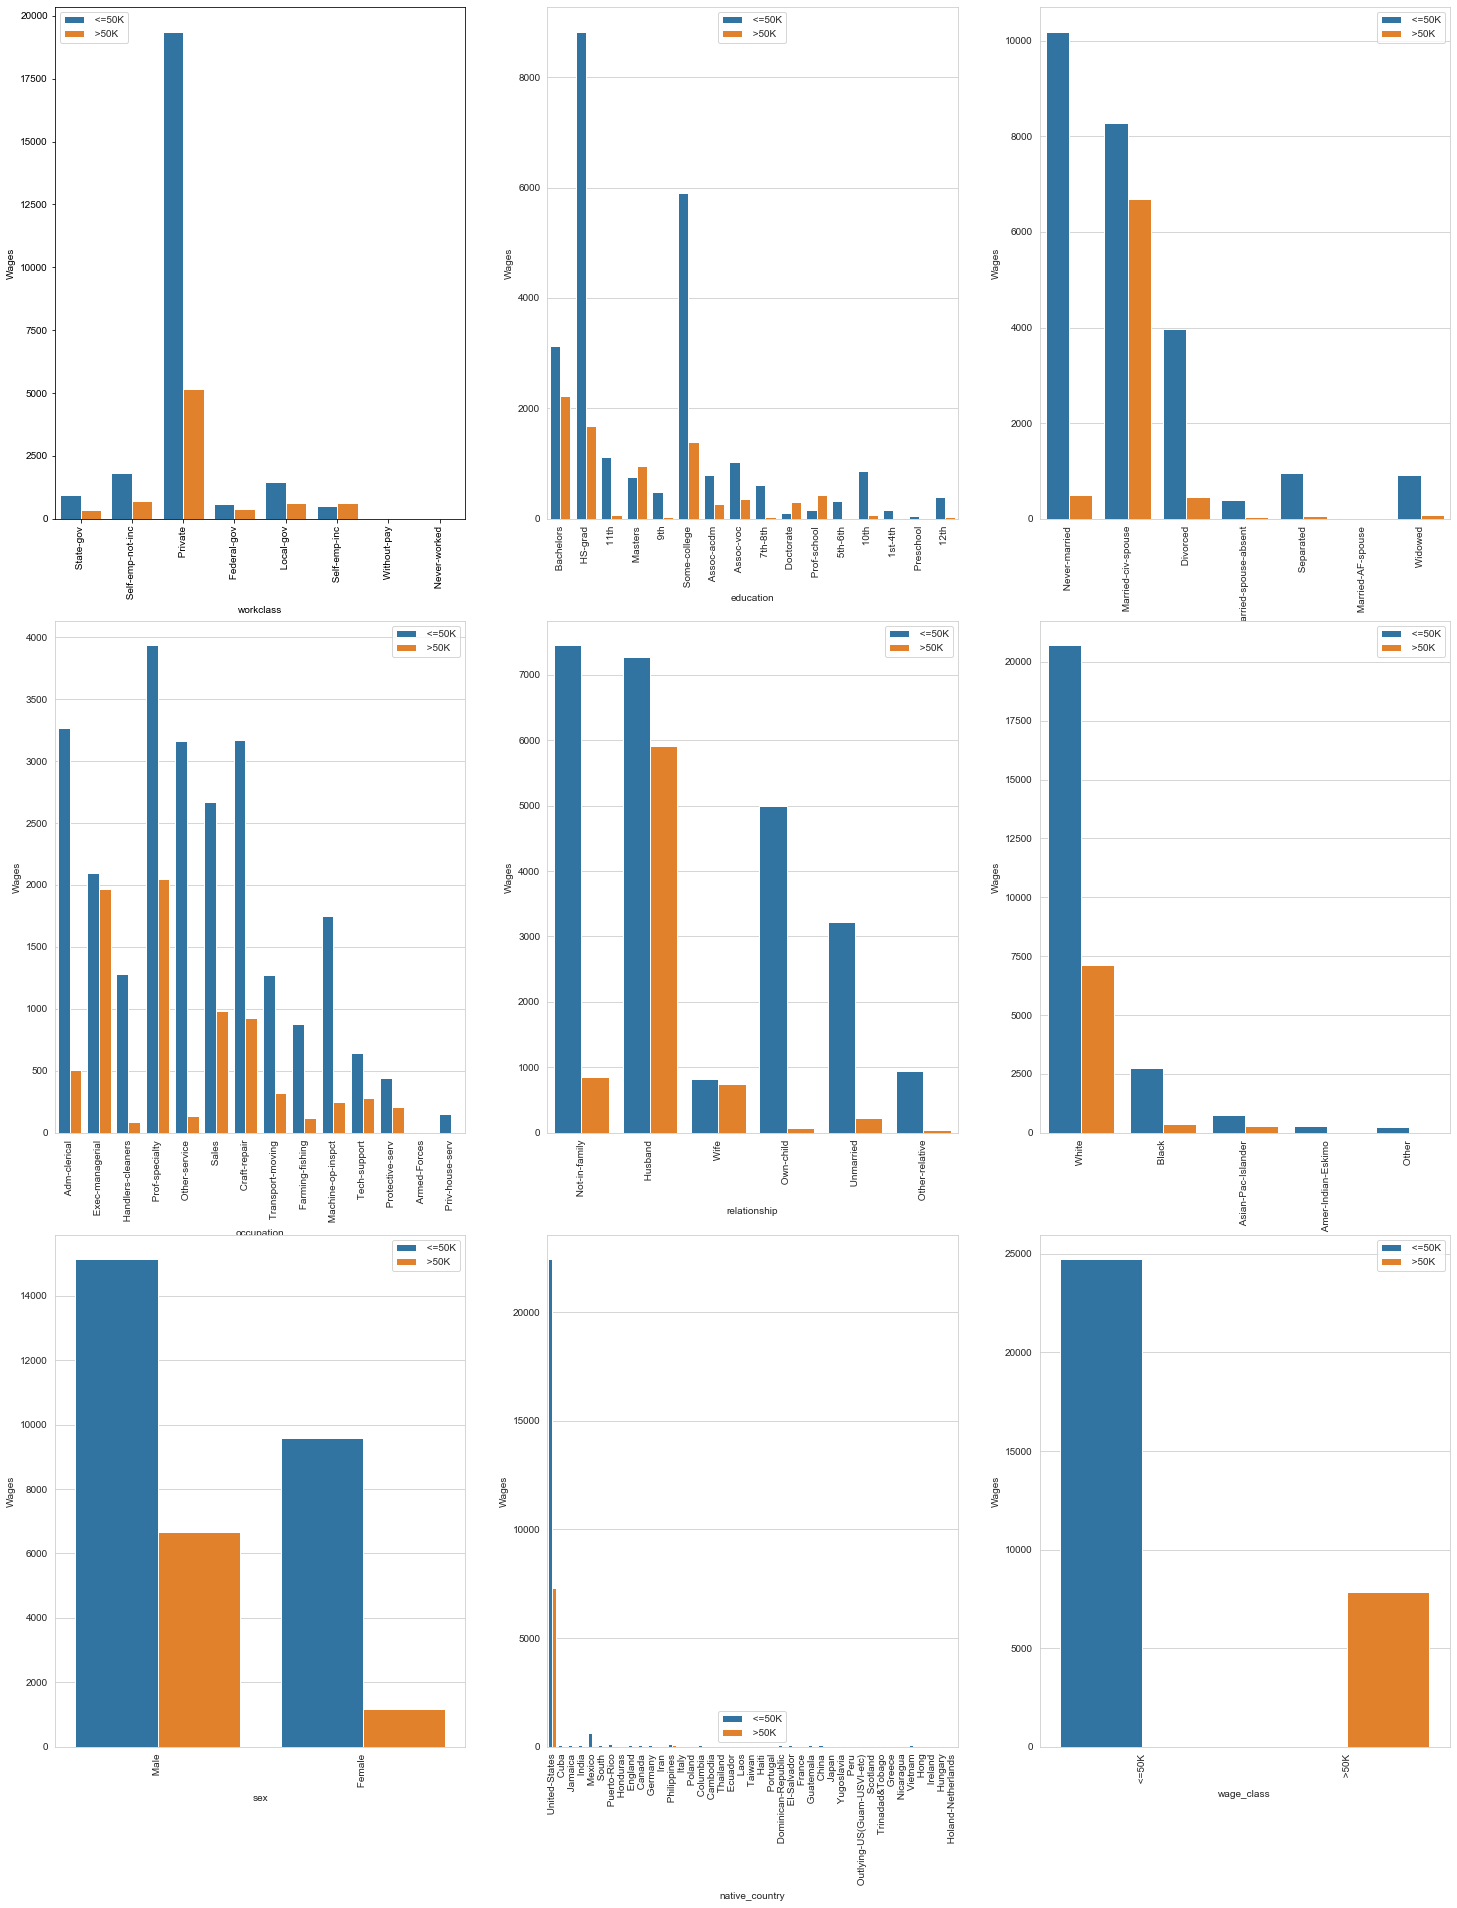

In [54]:
plt.figure(figsize=(25,32))
pt=1

for i in train_sample.drop(['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'],axis=1):
    if pt <=14:
        plt.subplot(3,3,pt)
        sns.set_style('whitegrid')
        a=sns.countplot(i,data=train_sample,hue='wage_class')
        a.set_xticklabels(a.get_xticklabels(),rotation=90,fontsize=10,)
        plt.legend()
        #plt.xlabel(i,fontsize=12)
        plt.ylabel('Wages')
    pt+=1
plt.show    

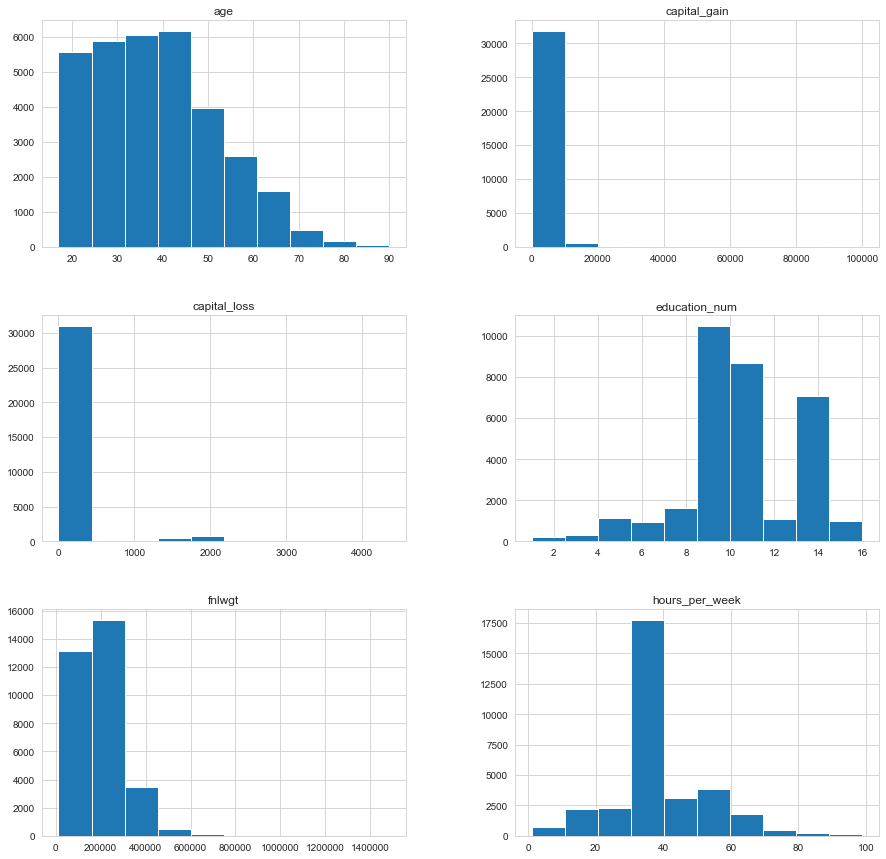

In [55]:
train_sample.hist(figsize=(15,15))
plt.show()

In [56]:
train_new.head(1)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,0


In [57]:
#Training data
x_train=train_new.drop(['wage_class'],axis=1)
y_train=train_new['wage_class']
print('The size of training data is: ',x_train.shape)

The size of training data is:  (32561, 13)


In [58]:
#Testing data
x_test=test_new.drop(['wage_class'],axis=1)
y_test=test_new['wage_class']
print('The size of training data is: ',x_test.shape)

The size of training data is:  (16281, 13)


In [59]:
x_train.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,13,1,3,2,1,1,0,0,40,1


In [60]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [61]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\Windows 10\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
print('The accuracy of training data is: ',xgb.score(x_train,y_train))
print('The accuracy of testing data is: ',xgb.score(x_test,y_test))
y_pred=xgb.predict(x_test)

The accuracy of training data is:  0.9033813457817634
The accuracy of testing data is:  0.8708924513236288


In [63]:
accuracy_score(y_test,y_pred)

0.8708924513236288

In [64]:
z=confusion_matrix(y_test,y_pred)
z

array([[11680,   755],
       [ 1347,  2499]], dtype=int64)

In [65]:
TP=z[0][0]
FP=z[0][1]
FN=z[1][0]
TN=z[1][1]

In [66]:
print('True positive is: ',TP)
print('False positive is: ',FP)
print('False Negative is: ',FN)
print('True Negative is: ',TN)

True positive is:  11680
False positive is:  755
False Negative is:  1347
True Negative is:  2499


In [67]:
accuracy= (TP+TN) / (TP+TN+FN+FP)
print('The accuracy of model is: ',accuracy)

The accuracy of model is:  0.8708924513236288


In [68]:
# recall = TP / (TP+FN)
# print('The recall of model is: ',recall)

In [69]:
# precision =TP / (TP+FP)
# print('The precision of model is: ',precision)

In [70]:
# F1_score= 2*(precision * recall) / (recall+precision)
# print('The F1_score of model is: ',F1_score) 

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.77      0.65      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



In [72]:
# Although the accuracy of model is good still we will perform Grid Search CV to increasase the accuracy
#XGBClassifier()

In [73]:
param={
    'n_estimators' : [5,10,15,20],
    'max_depth' : range(2,5,1),
    'learning_rate' :[.001,.01,1,10]
}

In [74]:
grid=GridSearchCV(xgb,param,verbose=3,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Windows 10\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [75]:
print('The best param are: ',grid.best_params_)

The best param are:  {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 20}


In [76]:
xgb1=XGBClassifier(learning_rate= 1, max_depth= 4, n_estimators= 20)
xgb1.fit(x_train,y_train)

[20:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
print('The accuracy of training data is: ',xgb1.score(x_train,y_train))
print('The accuracy of testing data is: ',xgb1.score(x_test,y_test))

The accuracy of training data is:  0.8803783667577777
The accuracy of testing data is:  0.8679442294699343
